# Ratings Prediction- Project

# Overview:-

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

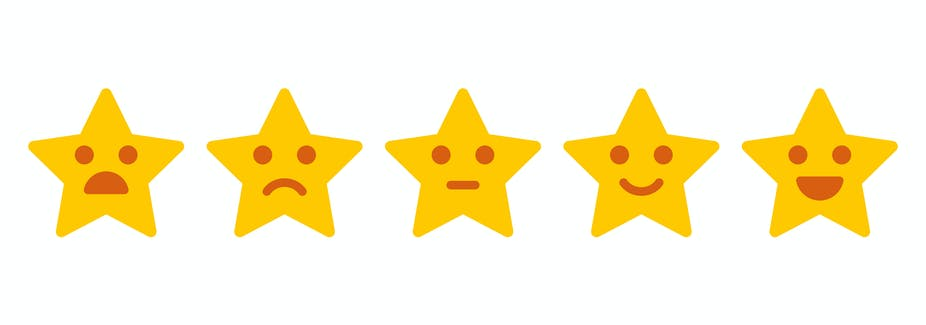

In [2]:
#Rating prediction image
from IPython import display
display.Image("rate.jpg")

# Problem Statement:-

This project contains two phases:-

1- Data Collection Phase:-
    
We have to scrape at least 20000 rows of data. WE can scrape more data as well, it’s up to you. more the data better the model
In this section we need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras,Monitors, Home theater, Router from different e-commerce websites.
Basically, we need these columns-

1) reviews of the product.

2) rating of the product.

We can fetch other data as well, if we think data can be useful or can help in the project. It completely depends on our imagination or assumption.

2- Model Building Phase:-
    
After collecting the data, we need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps like-

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Preprocessing

4. Model Building

5. Model Evaluation

6. Selecting the best model

# Business Goal:-
    
First we need to collect rating data from different websites using web scraping techniques and then need to build a machine learning model.

# Software & Hardware Requirements:-
We have used Python and Jupyter Notebook to compute the majority of this case study. Packages and libraries used in this project are:-

1- Pandas (data analysis)

2- Numpy (matrix computation)

3- Matplotlib.pyplot (Visualization)

4- Seaborn (visualization)

5- Scikit-Learn (Machine Learning)

6- Scipy (Z-score)

7- Joblib (saving final model)

8- Selenium Webdriver & Exceptions

9- Warnings (filter warnings) & etc. Microsoft Excel ( for calculations and Data Handling)

Processor used:- Intel I3

O/s used: 64bit Windows 10

RAM:4GB

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing dataset
df=pd.read_csv('rating_data.csv')
df

,Unnamed: 0,Unnamed: 0.1,Product type,Title,Review,Rating
0,0,0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5 star
1,1,1,Smart Phone,"Super slim and smooth, I'm love in it.","Got it first by prime...smooth and slim, batte...",5 star
2,2,2,Smart Phone,after 1 Day of usage,A day spent on exploring my new device and I w...,5 star
3,3,3,Smart Phone,Very very sleek I didn’t expect that slim,I didn’t expect this kind of slimness of the p...,5 star
4,4,4,Smart Phone,Samsung Top Quality budget phone,Ordered on 2nd Oct. Received on 3rd Oct/Aamzon...,5 star
...,...,...,...,...,...,...
21922,21922,3287,Router,"Cute device, worked fine for me, recommended","Need to check backup, using 9v output.",5 star
21923,21923,3288,Router,Best UPS for Wifi Routers,I have been searching for a router ups as I fa...,5 star
21924,21924,3289,Router,Working as expected,Very easy setup. Packing need to improve. At ...,5 star
21925,21925,3290,Router,Hold good charge and powers well,Works very well and holds good power. I had a ...,5 star


In [5]:
#Removing Columns "Unnamed:0 & Unnamed: 0.1" as these will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Unnamed: 0.1',axis=1,inplace=True)
df

,Product type,Title,Review,Rating
0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5 star
1,Smart Phone,"Super slim and smooth, I'm love in it.","Got it first by prime...smooth and slim, batte...",5 star
2,Smart Phone,after 1 Day of usage,A day spent on exploring my new device and I w...,5 star
3,Smart Phone,Very very sleek I didn’t expect that slim,I didn’t expect this kind of slimness of the p...,5 star
4,Smart Phone,Samsung Top Quality budget phone,Ordered on 2nd Oct. Received on 3rd Oct/Aamzon...,5 star
...,...,...,...,...
21922,Router,"Cute device, worked fine for me, recommended","Need to check backup, using 9v output.",5 star
21923,Router,Best UPS for Wifi Routers,I have been searching for a router ups as I fa...,5 star
21924,Router,Working as expected,Very easy setup. Packing need to improve. At ...,5 star
21925,Router,Hold good charge and powers well,Works very well and holds good power. I had a ...,5 star


In [6]:
#Shape of our Dataset after removal of 3 Columns
print("Shape of our dataset is ",df.shape)
print("Column count in our dataset is",df.shape[1])
print("Row count in our dataset is ",df.shape[0])

Shape of our dataset is  (21927, 4)
Column count in our dataset is 4
Row count in our dataset is  21927


In [7]:
#Let's check type of data in our Dataset
df.dtypes

Product type    object
Title           object
Review          object
Rating          object
dtype: object

In [8]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())
print("\nPlease see the detail below:-")
df.isna()

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Product type    0
Title           0
Review          0
Rating          0
dtype: int64

Please see the detail below:-


,Product type,Title,Review,Rating
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
21922,False,False,False,False
21923,False,False,False,False
21924,False,False,False,False
21925,False,False,False,False


In [9]:
#Let's check our columns in detail
df.columns

Index(['Product type', 'Title', 'Review', 'Rating'], dtype='object')

In [10]:
#Concise Summary of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21927 entries, 0 to 21926
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product type  21927 non-null  object
 1   Title         21927 non-null  object
 2   Review        21927 non-null  object
 3   Rating        21927 non-null  object
dtypes: object(4)
memory usage: 685.3+ KB


In [11]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique()) 

Column-wise Unique values are as:-

 Unique values in  Product type  column is  8

 Unique values in  Title  column is  12838

 Unique values in  Review  column is  14469

 Unique values in  Rating  column is  5


In [12]:
#checking size of dataFrame
df.size

87708

In [13]:
#Let's check value count of object datatype columns
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Smart watch            3659
Smart Phone            3609
Router                 3292
Home theater           2926
Monitor                2898
Headphones             2415
Laptop                 1754
Professional camera    1374
Name: Product type, dtype: int64

Good                                    221
Value for money                         145
Good product                            128
Average                                  52
Nice product                             48
                                       ... 
Mi sending their dump to India now        1
Disappointed with camera                  1
Inefficient parental control              1
Very good product and light weight        1
Absolutely Best in the price range..      1
Name: Title, Length: 12838, dtype: int64

Good                                                                                                                                                                                                                    

<AxesSubplot:>

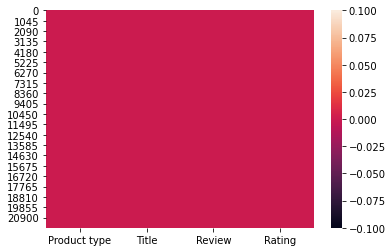

In [14]:
#To check missing values using Seaborn Heatmap
sns.heatmap(df.isnull())

Observation:

Dataset has no missing values.

In [15]:
#removing star word from Rating column
for i in range(len(df["Rating"])):
    df["Rating"][i] = int(df["Rating"][i].replace(" star",""))

In [16]:
df.head()

,Product type,Title,Review,Rating
0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5
1,Smart Phone,"Super slim and smooth, I'm love in it.","Got it first by prime...smooth and slim, batte...",5
2,Smart Phone,after 1 Day of usage,A day spent on exploring my new device and I w...,5
3,Smart Phone,Very very sleek I didn’t expect that slim,I didn’t expect this kind of slimness of the p...,5
4,Smart Phone,Samsung Top Quality budget phone,Ordered on 2nd Oct. Received on 3rd Oct/Aamzon...,5


In [33]:
#import NLP libraries
import re
import nltk
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [34]:
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [35]:
title_words = []
words_for_cloud = ''
for i in df["Title"]:
    
    p = i.translate(str.maketrans("","",string.punctuation))
    p = remove_emojis(p).strip()
    
    text = re.sub(r'\[[0-9]+\]',' ',p)
    text = re.sub(r'\s+',' ',text)
    
    text=text.lower()
    
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    
    title_words.append(word_tokenize(text))
    
for i in range(len(title_words)):
    title_words[i] = [word for word in title_words[i]
                     if word not in stopwords.words("english") if word not in string.punctuation]
    for j in range(len(title_words[i])):
        words_for_cloud += title_words[i][j] + ' '

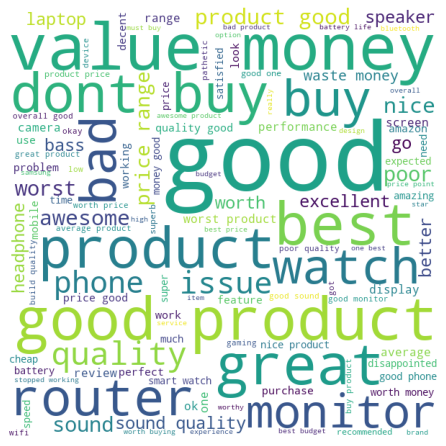

In [36]:
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                min_font_size = 10).generate(words_for_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

The words which are mostly occured in title summary are Product, best, good, buy, money, value, price,great, bad, worst, dont etc.

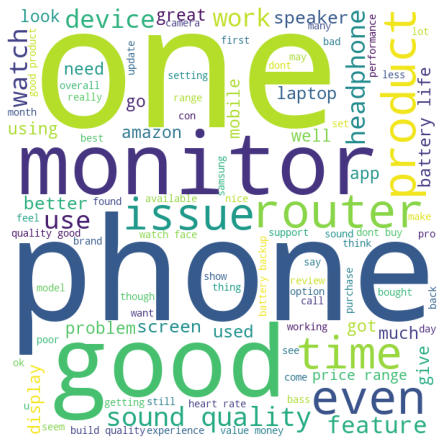

In [37]:
review_words = []
words_for_cloud1 = ''
for i in df["Review"]:
    
    p = i.translate(str.maketrans("","",string.punctuation))
    p = remove_emojis(p).strip()
    
    text = re.sub(r'\[[0-9]+\]',' ',p)
    text = re.sub(r'\s+',' ',text)
    
    text=text.lower()
    
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    
    review_words.append(word_tokenize(text))
    
for i in range(len(review_words)):
    review_words[i] = [word for word in review_words[i]
                     if word not in stopwords.words("english") if word not in string.punctuation]
    for j in range(len(review_words[i])):
        words_for_cloud1 += review_words[i][j] + ' '
        
        
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                min_font_size = 10).generate(words_for_cloud1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

The words good, one, even, quality, routor, phone, product, use, problem, monitor,sound,issue time etc; are mostly used.

In [38]:
for i in range(len(df["Review"])):
    df["Review"][i] = df["Title"][i]+ " "+ df["Review"][i]

In [39]:
df

,Product type,Title,Review,Rating
0,Smart Phone,Best phone but ( Prime member got 1000 loss),Best phone but ( Prime member got 1000 loss) P...,5
1,Smart Phone,"Super slim and smooth, I'm love in it.","Super slim and smooth, I'm love in it. Got it ...",5
2,Smart Phone,after 1 Day of usage,after 1 Day of usage A day spent on exploring ...,5
3,Smart Phone,Very very sleek I didn’t expect that slim,Very very sleek I didn’t expect that slim I di...,5
4,Smart Phone,Samsung Top Quality budget phone,Samsung Top Quality budget phone Ordered on 2n...,5
...,...,...,...,...
21922,Router,"Cute device, worked fine for me, recommended","Cute device, worked fine for me, recommended N...",5
21923,Router,Best UPS for Wifi Routers,Best UPS for Wifi Routers I have been searchin...,5
21924,Router,Working as expected,Working as expected Very easy setup. Packing ...,5
21925,Router,Hold good charge and powers well,Hold good charge and powers well Works very we...,5


In [40]:
df.drop(columns=["Title"],inplace=True)
df

,Product type,Review,Rating
0,Smart Phone,Best phone but ( Prime member got 1000 loss) P...,5
1,Smart Phone,"Super slim and smooth, I'm love in it. Got it ...",5
2,Smart Phone,after 1 Day of usage A day spent on exploring ...,5
3,Smart Phone,Very very sleek I didn’t expect that slim I di...,5
4,Smart Phone,Samsung Top Quality budget phone Ordered on 2n...,5
...,...,...,...
21922,Router,"Cute device, worked fine for me, recommended N...",5
21923,Router,Best UPS for Wifi Routers I have been searchin...,5
21924,Router,Working as expected Very easy setup. Packing ...,5
21925,Router,Hold good charge and powers well Works very we...,5


In [41]:
model_words = []
for i in df["Review"]:
    
    p = i.translate(str.maketrans("","",string.punctuation))
    p = remove_emojis(p).strip()
    
    text = re.sub(r'\[[0-9]+\]',' ',p)
    text = re.sub(r'\s+',' ',text)
    
    text=text.lower()
    
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    
    model_words.append(word_tokenize(text))
    
for i in range(len(model_words)):
    model_words[i] = [word for word in model_words[i]
                     if word not in stopwords.words("english") if word not in string.punctuation]

In [42]:
model_words[0:10]

[['best',
  'phone',
  'prime',
  'member',
  'got',
  'loss',
  'pros',
  'exellent',
  'disply',
  'smooth',
  'samsung',
  'ui',
  'best',
  'back',
  'camera',
  'also',
  'good',
  'mobile',
  'slim',
  'light',
  'weight',
  'cons',
  'w',
  'charger',
  'takes',
  'exact',
  'hours',
  'get',
  'full',
  'charged',
  'overall',
  'phone',
  'price',
  'range',
  'k',
  'best'],
 ['super',
  'slim',
  'smooth',
  'im',
  'love',
  'got',
  'first',
  'primesmooth',
  'slim',
  'battery',
  'backup',
  'also',
  'awesome',
  'must',
  'buy',
  'guysthe',
  'brand',
  'samsung',
  'feeling',
  'issue',
  'feel',
  'battery',
  'charging',
  'timeit',
  'took',
  'hr',
  'min',
  'full',
  'charge'],
 ['day',
  'usage',
  'day',
  'spent',
  'exploring',
  'new',
  'device',
  'want',
  'tell',
  'amazing',
  'experience',
  'first',
  'samsung',
  'device',
  'fan',
  'samsung',
  'galaxys',
  'ui',
  'bit',
  'issues',
  'overall',
  'gray',
  'gb',
  'ram',
  'variant',
  'prime'

In [43]:
model = Word2Vec(model_words, min_count=1,workers=3, window = 3)

In [44]:
model.corpus_count

21927

In [45]:
model.wv.most_similar("good")

[('decent', 0.8663619160652161),
 ('nice', 0.8324199914932251),
 ('impressive', 0.8016073107719421),
 ('excellent', 0.7997680306434631),
 ('great', 0.7983903288841248),
 ('amazing', 0.7923105955123901),
 ('superb', 0.7768594026565552),
 ('average', 0.7718470096588135),
 ('perfect', 0.7714136242866516),
 ('awesome', 0.7693645358085632)]

In [46]:
model.wv.vectors.shape

(25908, 100)

In [48]:
vocab = set(model.wv.index2word)
len(vocab)

25908

In [49]:
def makeFeatureVec(words, model, vector_size):
    featureVec = np.zeros((vector_size,),dtype="float32")
    nwords = 0
    for word in words:
        if word in vocab:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model.wv[word])
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [50]:
def getAvgFeatureVecs(reviews, model, vector_size):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),vector_size),dtype="float32")
    for review in reviews:
        if counter%1000 == 0:
            print("Review {} of {}".format(counter, len(reviews)))
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, vector_size)
        counter = counter + 1
    return reviewFeatureVecs

In [51]:
DataVecs = getAvgFeatureVecs( model_words, model, 100 )

Review 0 of 21927
Review 1000 of 21927
Review 2000 of 21927
Review 3000 of 21927
Review 4000 of 21927
Review 5000 of 21927
Review 6000 of 21927
Review 7000 of 21927
Review 8000 of 21927
Review 9000 of 21927
Review 10000 of 21927
Review 11000 of 21927
Review 12000 of 21927
Review 13000 of 21927
Review 14000 of 21927
Review 15000 of 21927
Review 16000 of 21927
Review 17000 of 21927
Review 18000 of 21927
Review 19000 of 21927
Review 20000 of 21927
Review 21000 of 21927


In [52]:
DataVecs.shape

(21927, 100)

In [53]:
word_embed = pd.DataFrame(DataVecs)

In [54]:
word_embed

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.459553,0.152946,0.331109,-0.190235,0.322553,-0.242774,0.423048,-0.896417,-0.334879,-0.206790,...,-0.091900,0.291951,-0.708336,0.086713,0.106678,0.271255,0.440305,-0.485474,-0.456521,-0.614881
1,-0.356737,0.079263,0.178932,-0.048396,0.135697,-0.141214,0.121455,-0.875470,-0.173512,-0.266645,...,0.072784,0.196199,-0.524069,0.062322,0.173696,0.095355,0.647585,-0.528172,-0.513086,-0.342412
2,-0.148308,-0.034395,0.334033,-0.046900,0.274376,-0.091284,0.237512,-0.731453,-0.212231,0.224194,...,-0.084043,0.164874,-0.540731,0.145481,0.128245,0.065300,0.550848,-0.371469,-0.306278,-0.383960
3,-0.074838,-0.099615,0.212397,-0.147973,0.232692,-0.254446,0.179719,-0.852568,-0.045720,-0.035545,...,0.066034,-0.011624,-0.372958,0.312814,0.123440,0.266252,0.341239,-0.444516,-0.265314,-0.293583
4,-0.262405,0.140591,0.236796,-0.027426,0.135079,-0.084501,0.208869,-0.716659,-0.356224,0.005849,...,-0.177894,0.064937,-0.428727,0.087669,0.200447,-0.054199,0.518367,-0.341998,-0.495678,-0.322453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21922,-0.337278,-0.123557,0.277612,-0.015034,0.524129,-0.088864,0.030863,-0.580695,-0.197522,-0.216390,...,0.183103,0.020452,-0.725880,-0.159065,0.066399,-0.044870,0.737015,-0.264454,-0.214006,-0.267533
21923,-0.289195,0.081437,0.344326,0.007004,0.187400,-0.218353,0.171850,-0.801375,-0.240528,0.121937,...,-0.046381,0.267530,-0.719359,-0.138633,0.296890,0.024871,0.603795,-0.262660,-0.393739,-0.384579
21924,-0.219006,-0.154446,-0.065115,-0.156645,0.248378,0.199673,0.165826,-0.568039,-0.668144,0.053192,...,-0.077961,-0.108905,-0.268002,0.063398,-0.013521,0.037973,0.889451,-0.287053,-0.488891,-0.119604
21925,-0.196877,-0.001697,0.381202,-0.021677,-0.108511,-0.118830,-0.228597,-0.972472,-0.569763,-0.248632,...,0.140564,-0.112654,-0.394788,-0.218768,0.500087,0.093890,0.531868,-0.392675,-0.439272,-0.308190


In [55]:
df.drop(columns=["Review"],inplace = True)

In [56]:
df = pd.concat([df,word_embed],axis=1)

In [57]:
df.shape

(21927, 102)

In [58]:
df

,Product type,Rating,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,Smart Phone,5,-0.459553,0.152946,0.331109,-0.190235,0.322553,-0.242774,0.423048,-0.896417,...,-0.091900,0.291951,-0.708336,0.086713,0.106678,0.271255,0.440305,-0.485474,-0.456521,-0.614881
1,Smart Phone,5,-0.356737,0.079263,0.178932,-0.048396,0.135697,-0.141214,0.121455,-0.875470,...,0.072784,0.196199,-0.524069,0.062322,0.173696,0.095355,0.647585,-0.528172,-0.513086,-0.342412
2,Smart Phone,5,-0.148308,-0.034395,0.334033,-0.046900,0.274376,-0.091284,0.237512,-0.731453,...,-0.084043,0.164874,-0.540731,0.145481,0.128245,0.065300,0.550848,-0.371469,-0.306278,-0.383960
3,Smart Phone,5,-0.074838,-0.099615,0.212397,-0.147973,0.232692,-0.254446,0.179719,-0.852568,...,0.066034,-0.011624,-0.372958,0.312814,0.123440,0.266252,0.341239,-0.444516,-0.265314,-0.293583
4,Smart Phone,5,-0.262405,0.140591,0.236796,-0.027426,0.135079,-0.084501,0.208869,-0.716659,...,-0.177894,0.064937,-0.428727,0.087669,0.200447,-0.054199,0.518367,-0.341998,-0.495678,-0.322453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21922,Router,5,-0.337278,-0.123557,0.277612,-0.015034,0.524129,-0.088864,0.030863,-0.580695,...,0.183103,0.020452,-0.725880,-0.159065,0.066399,-0.044870,0.737015,-0.264454,-0.214006,-0.267533
21923,Router,5,-0.289195,0.081437,0.344326,0.007004,0.187400,-0.218353,0.171850,-0.801375,...,-0.046381,0.267530,-0.719359,-0.138633,0.296890,0.024871,0.603795,-0.262660,-0.393739,-0.384579
21924,Router,5,-0.219006,-0.154446,-0.065115,-0.156645,0.248378,0.199673,0.165826,-0.568039,...,-0.077961,-0.108905,-0.268002,0.063398,-0.013521,0.037973,0.889451,-0.287053,-0.488891,-0.119604
21925,Router,5,-0.196877,-0.001697,0.381202,-0.021677,-0.108511,-0.118830,-0.228597,-0.972472,...,0.140564,-0.112654,-0.394788,-0.218768,0.500087,0.093890,0.531868,-0.392675,-0.439272,-0.308190


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Product type"] = le.fit_transform(df["Product type"])

In [60]:
df

,Product type,Rating,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,6,5,-0.459553,0.152946,0.331109,-0.190235,0.322553,-0.242774,0.423048,-0.896417,...,-0.091900,0.291951,-0.708336,0.086713,0.106678,0.271255,0.440305,-0.485474,-0.456521,-0.614881
1,6,5,-0.356737,0.079263,0.178932,-0.048396,0.135697,-0.141214,0.121455,-0.875470,...,0.072784,0.196199,-0.524069,0.062322,0.173696,0.095355,0.647585,-0.528172,-0.513086,-0.342412
2,6,5,-0.148308,-0.034395,0.334033,-0.046900,0.274376,-0.091284,0.237512,-0.731453,...,-0.084043,0.164874,-0.540731,0.145481,0.128245,0.065300,0.550848,-0.371469,-0.306278,-0.383960
3,6,5,-0.074838,-0.099615,0.212397,-0.147973,0.232692,-0.254446,0.179719,-0.852568,...,0.066034,-0.011624,-0.372958,0.312814,0.123440,0.266252,0.341239,-0.444516,-0.265314,-0.293583
4,6,5,-0.262405,0.140591,0.236796,-0.027426,0.135079,-0.084501,0.208869,-0.716659,...,-0.177894,0.064937,-0.428727,0.087669,0.200447,-0.054199,0.518367,-0.341998,-0.495678,-0.322453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21922,5,5,-0.337278,-0.123557,0.277612,-0.015034,0.524129,-0.088864,0.030863,-0.580695,...,0.183103,0.020452,-0.725880,-0.159065,0.066399,-0.044870,0.737015,-0.264454,-0.214006,-0.267533
21923,5,5,-0.289195,0.081437,0.344326,0.007004,0.187400,-0.218353,0.171850,-0.801375,...,-0.046381,0.267530,-0.719359,-0.138633,0.296890,0.024871,0.603795,-0.262660,-0.393739,-0.384579
21924,5,5,-0.219006,-0.154446,-0.065115,-0.156645,0.248378,0.199673,0.165826,-0.568039,...,-0.077961,-0.108905,-0.268002,0.063398,-0.013521,0.037973,0.889451,-0.287053,-0.488891,-0.119604
21925,5,5,-0.196877,-0.001697,0.381202,-0.021677,-0.108511,-0.118830,-0.228597,-0.972472,...,0.140564,-0.112654,-0.394788,-0.218768,0.500087,0.093890,0.531868,-0.392675,-0.439272,-0.308190
